In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

In [8]:
!pip install pandas
import pandas as pd 
x = pd.DataFrame(housing.data, columns = housing.feature_names)
print(x)

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 2.6 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.5 MB 2.6 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.5 MB 2.6 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.5 MB 2.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/11.5 MB 612.8 kB/s eta 0:00:18
   ---- ----------------------------------- 1.3/11.5 MB 993.5 kB/s eta 0:00:11
   ------ --------------------------------- 1.8/11.5 MB 1.2 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/11.5 MB 1.4 MB/s eta 0:00:07
   ---------- ----------------------------- 2.9/11.5 MB 1.5 MB/s eta 0:00:06
   ----------- ---------------------------- 3.4/11.5 MB 1.6 MB/s eta 0:00:06
   -------------- ------------------------- 4.2/11.5 MB 1.8 MB/s eta 0:00:05
   ----------------- ---------------------- 5.0/11.5 MB 1.9 MB/s eta 0:00:04
  

In [10]:
print(x.columns)


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [11]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [12]:
y = pd.DataFrame(housing.target)
print(y)

           0
0      4.526
1      3.585
2      3.521
3      3.413
4      3.422
...      ...
20635  0.781
20636  0.771
20637  0.923
20638  0.847
20639  0.894

[20640 rows x 1 columns]


In [14]:
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df["MedInc"] = housing.target
print(housing_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   4.526      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1   3.585      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2   3.521      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3   3.413      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4   3.422      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


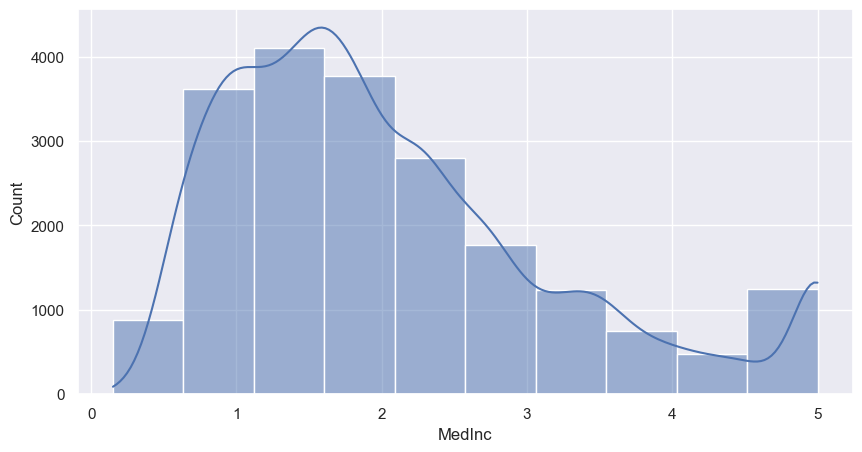

In [17]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 크기 설정
sns.set(rc={'figure.figsize':(10, 5)})

# 히스토그램 그리기 (최신 방식)
sns.histplot(housing_df['MedInc'], bins=10, kde=True)

# 그래프 출력
plt.show()

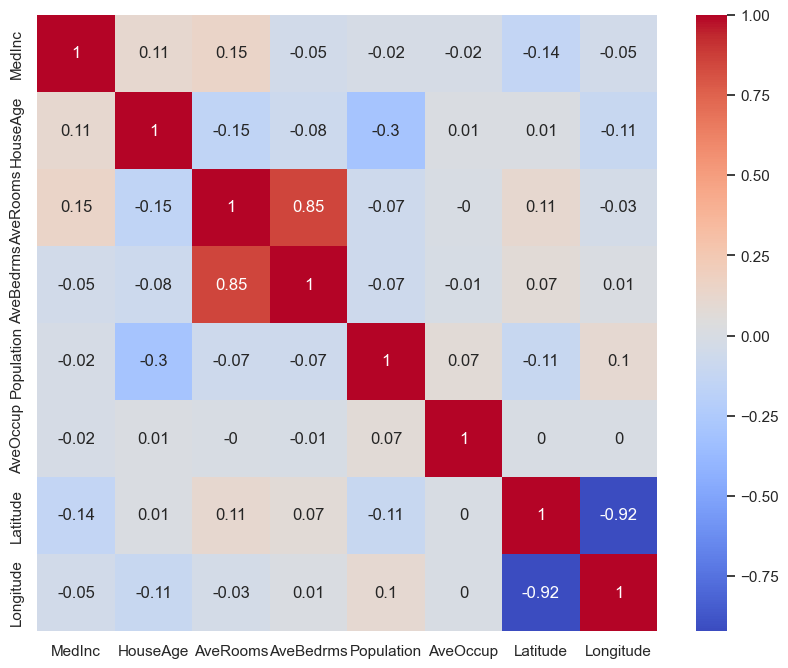

In [19]:
# 상관계수 행렬 생성
correlation_matrix = housing_df.corr().round(2)

# 시각화
sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

In [24]:
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
housing_df['MedHouseVal'] = housing_df.target


KeyError: "['MedHouseVal'] not found in axis"

In [22]:
# 7. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

NameError: name 'LinearRegression' is not defined

In [23]:

# 8. 예측
y_pred = model.predict(X_test)

# 9. 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R2 Score: {r2:.4f}')

# 10. 실제값 vs 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted House Value')
plt.show()

NameError: name 'model' is not defined